Learned Theta_0: -100559579014623924767868844963106037062468117326748939450646927531409404026744153322495982698496.0000
Learned Theta_1: -7326427288635143620967053747859690313234556035638624697732592825340190692364436098326902412935168.0000
Predicted value for size 70: -512950469783474681601735659150059764001133837647853304062802627266710541831899364891863753559113728.00


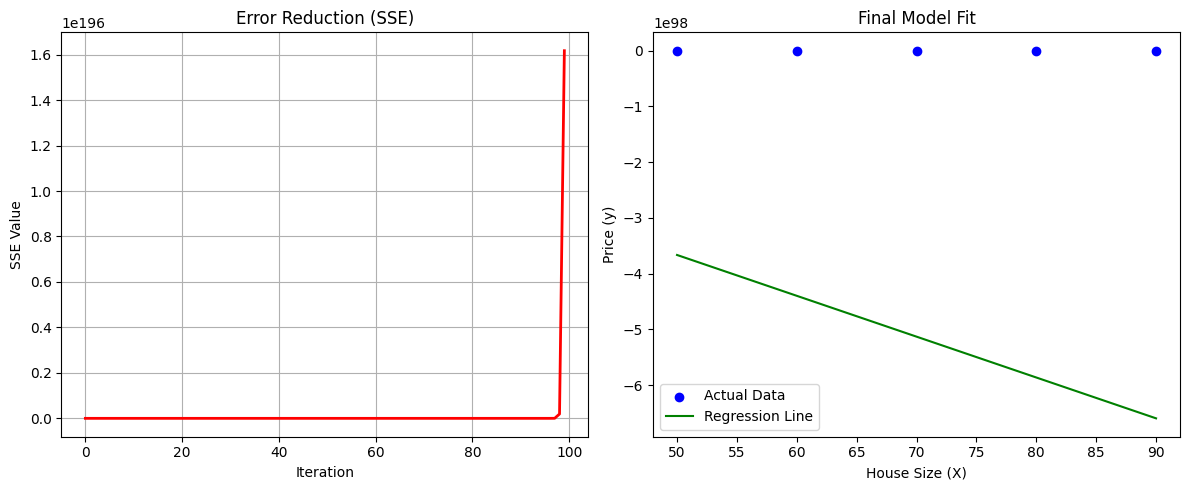

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    """
    Linear Regression model using Gradient Descent optimization.
    
    Attributes:
        lr (float): Learning rate to control the step size during optimization.
        n_iters (int): Number of iterations for the training process.
        theta0 (float): The intercept (bias) of the regression line.
        theta1 (float): The slope (weight) of the regression line.
        sse_history (list): Stores Sum of Squared Errors for each iteration to track convergence.
    """

    def __init__(self, lr=0.001, n_iters=100):
        """Initializes the model with learning rate and number of iterations[cite: 15, 16]."""
        self.lr = lr
        self.n_iters = n_iters
        self.theta0 = 0.0
        self.theta1 = 0.0
        self.sse_history = []

    def fit(self, X, y):
        """
        Trains the model using Gradient Descent[cite: 17].
        
        Args:
            X (ndarray): Independent variable (House Size).
            y (ndarray): Dependent variable (House Price).
        """
        m = len(y)  # Number of training examples
        
        for i in range(self.n_iters):
            # 1. Prediction: y = theta0 + theta1 * X
            y_pred = self.theta0 + self.theta1 * X
            
            # 2. Calculate SSE: Sum of squared differences between predicted and actual values [cite: 32]
            sse = np.sum((y_pred - y)**2)
            self.sse_history.append(sse)
            
            # 3. Gradient Calculation: Partial derivatives of SSE with respect to theta0 and theta1
            d_theta0 = (2/m) * np.sum(y_pred - y)
            d_theta1 = (2/m) * np.sum((y_pred - y) * X)
            
            # 4. Weight Update: Move parameters in the opposite direction of the gradient
            self.theta0 -= self.lr * d_theta0
            self.theta1 -= self.lr * d_theta1

    def predict(self, X):
        """Predicts the target value for a given input X[cite: 23]."""
        return self.theta0 + self.theta1 * X

    def plot_training(self, X, y):
        """
        Visualizes the training process: SSE reduction and the final regression line[cite: 29, 30].
        """
        plt.figure(figsize=(12, 5))
        
        # Plot 1: SSE vs Iterations (Checking for Convergence [cite: 37])
        plt.subplot(1, 2, 1)
        plt.plot(range(len(self.sse_history)), self.sse_history, color='red', linewidth=2)
        plt.title('Error Reduction (SSE)')
        plt.xlabel('Iteration')
        plt.ylabel('SSE Value')
        plt.grid(True)
        
        # Plot 2: Final Regression Line with Data Points [cite: 33]
        plt.subplot(1, 2, 2)
        plt.scatter(X, y, color='blue', label='Actual Data')
        plt.plot(X, self.predict(X), color='green', label='Regression Line')
        plt.title('Final Model Fit')
        plt.xlabel('House Size (X)')
        plt.ylabel('Price (y)')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# --- Execution ---

# Load Data: Convert lists to numpy arrays [cite: 12]
X = np.array([50, 60, 70, 80, 90]) # [cite: 8]
y = np.array([150, 180, 210, 240, 270]) # [cite: 10]

# Initialize and Train [cite: 14]
model = LinearRegressionGD(lr=0.001, n_iters=100)
model.fit(X, y)

# Output learned parameters [cite: 18, 20]
print(f"Learned Theta_0: {model.theta0:.4f}")
print(f"Learned Theta_1: {model.theta1:.4f}")

# Prediction for house size 70 [cite: 24, 25]
pred_value = model.predict(70)
print(f"Predicted value for size 70: {pred_value:.2f}")

# Visualize results
model.plot_training(X, y)